In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks', context='poster', font_scale=0.9,
            rc={'xtick.major.size': 3,
                'ytick.major.size': 3,
                'xtick.major.width': 1,
                'ytick.major.width': 1,
                'xtick.major.pad': 3.5,
                'ytick.major.pad': 3.5,
                'axes.linewidth': 1,
                'lines.linewidth': 2,
               })

from src.parameters import PROCESSED_DATA_DIR, ANIMALS
from loren_frank_data_processing import make_epochs_dataframe, read_analysis_files

In [4]:
epoch_info = make_epochs_dataframe(ANIMALS)
epoch_info = epoch_info.loc[
    (epoch_info.type == 'run') &
    (epoch_info.environment != 'lin')]
epoch_keys = epoch_info.index
epoch_info.head()

environment type  exposure
animal day epoch                           
HPa    1   4            wtr1  run       1.0
           6            wtr1  run       2.0
       2   2            wtr1  run       3.0
           4            wtr1  run       4.0
       3   2            wtr1  run       5.0

In [36]:
ripple_locked = read_analysis_files(
    PROCESSED_DATA_DIR, epoch_keys, group='firing_rate/all_ripples/bs_time').squeeze()

In [55]:
ripple_locked = xr.open_mfdataset('../Processed-Data/*.nc', group='firing_rate/all_ripples/bs_time').squeeze()

In [56]:
ripple_locked

<xarray.Dataset>
Dimensions:               (neuron_id: 1393, time: 299)
Coordinates:
  * time                  (time) float64 -0.09938 -0.09872 -0.09805 -0.09738 ...
  * neuron_id             (neuron_id) object 'HPa_01_04_001_001' ...
Data variables:
    firing_rate           (neuron_id, time) float64 0.8707 0.8393 0.8098 ...
    multiplicative_gain   (neuron_id, time) float64 1.0 0.964 0.9301 0.8982 ...
    baseline_firing_rate  (neuron_id) float64 0.8707 2.924 2.112 1.651 3.791 ...
    ks_statistic          (neuron_id) float64 0.3712 0.3239 0.2602 0.3047 ...
    AIC                   (neuron_id) float64 681.0 5.018e+03 532.7 369.6 ...

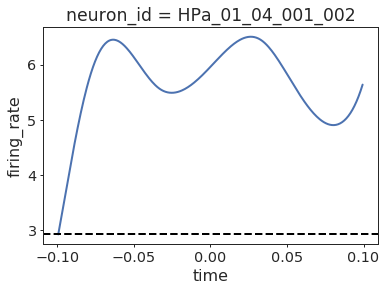

In [63]:
f, ax = plt.subplots()
ripple_locked.sel(neuron_id='HPa_01_04_001_002').firing_rate.plot(ax=ax)
ax.axhline(ripple_locked.sel(neuron_id='HPa_01_04_001_002').baseline_firing_rate,
           linestyle='--', color='black');

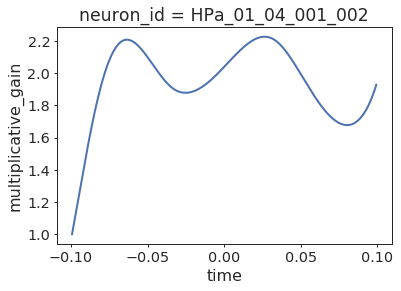

In [64]:
f, ax = plt.subplots()
ripple_locked.sel(neuron_id='HPa_01_04_001_002').multiplicative_gain.plot(ax=ax);

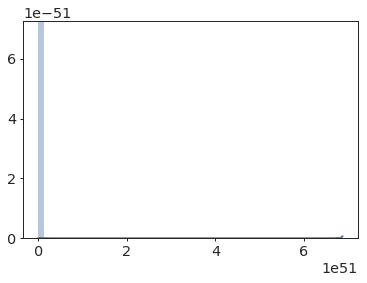

In [28]:
a = ripple_locked.firing_rate.squeeze().sel(
    animal='HPa', time=0).values.ravel()
sns.distplot(a[~np.isnan(a)])

(0, 5)

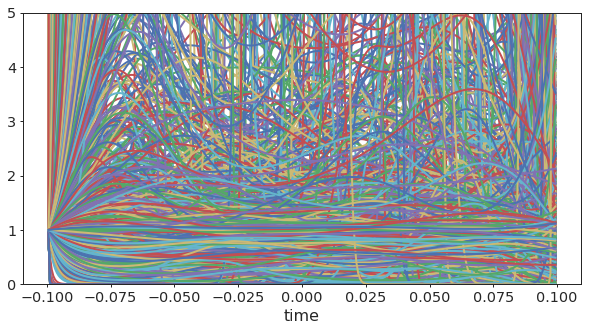

In [73]:
f, ax = plt.subplots(figsize=(10, 5))
ripple_locked.multiplicative_gain.to_dataframe().unstack(level=0).plot(legend=False, ax=ax);
ax.set_ylim((0, 5))